## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import layers, models, optimizers
from keras.layers import Input, Dense
from keras.models import Model

## Importing the dataset

In [2]:
x1 = pd.read_csv('/content/IB_Beef_1_270322.csv')
x1['target'] = 'Beef'
x2 = pd.read_csv('/content/IB_Ches_1_091121.csv')
x2['target'] = 'Cheese'
x3 = pd.read_csv('/content/IB_Chkn_1_091121.csv')
x3['target'] = 'Chicken'
x4 = pd.read_csv('/content/IB_Fsh_1_091121.csv')
x4['target'] = 'Fish'
x5 = pd.read_csv('/content/IB_Hony_1_091121.csv')
x5['target'] = 'Honey'
x6 = pd.read_csv('/content/IB_Jgrt_1_091121.csv')
x6['target'] = 'Joghurt'
x7 = pd.read_csv('/content/IB_Mlk_1_091121.csv')
x7['target'] = 'Milk'
x8 = pd.read_csv('/content/IB_Mshrm_1_091121.csv')
x8['target'] = 'Mushroom'
x9 = pd.read_csv('/content/IB_Pkld_1_091121.csv')
x9['target'] = 'Pickles'
x10 = pd.read_csv('/content/IB_SunFlowerOil_1_270322.csv')
x10['target'] = 'Sunflower Oil'
x11 = pd.read_csv('/content/IB_Tmt_1_091121.csv')
x11['target'] = 'Tomato paste'

dataframes=[x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11]
for i in dataframes:
    i.drop('Ticks',axis=1,inplace=True)

df = x1.append(x2,ignore_index=True)    
dataframes1=[x3,x4,x5,x6,x7,x8,x9,x10,x11]
for i in dataframes1:
    df = df.append(i,ignore_index=True)   
features = ['MQ2','MQ3','MQ4','MQ5','MQ6','MQ7','MQ8','MQ9','MQ135'] 
# Separating out the features
X = df.loc[:, features].values 
# Separating out the target
y = df.loc[:,['target']].values    

## Splitting data into  training set and test set

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

## Autoencoder Implementation

In [4]:
# this is the size of our encoded representations
encoding_dim = 6
input_dim = 9

input = Input(shape=(9,)) # Input data with 9-dimensions
encoded = Dense(8)(input) # 1st layer encoding to 8-dimensions
encoded = Dense(7)(encoded) # 2nd layer encoding to 7-dimensions

encoded = Dense(6)(encoded) # 3rd layer encoding to 6-dimensions --- the bottleneck

decoded = Dense(7)(encoded) # 4th layer decoding to 7-dimensions
decoded = Dense(8)(encoded) # 5th layer decoding to 8-dimensions
decoded = Dense(9)(encoded) # 6th layer decoding to 9-dimensions "lossy reconstruction of the input"
                   
autoencoder = Model(input, decoded) # this model maps an input to its reconstruction
encoder = Model(input, encoded) # this model maps an input to its encoded representation
encoded_input = Input(shape=(6,)) # create a placeholder for an encoded (6-dimensional) input
decoder_layer = autoencoder.layers[-1] # retrieve the last layer of the autoencoder model
decoder = Model(encoded_input, decoder_layer(encoded_input)) # create the decoder model

autoencoder.compile(loss='mean_squared_error', optimizer='adam')

In [5]:
au = autoencoder.fit(x_train, x_train, epochs=50, batch_size=65, 
                     shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
5067/5067 [==============================] - 12s 2ms/step - loss: 2304.3547 - val_loss: 45.5190
Epoch 2/50
5067/5067 [==============================] - 9s 2ms/step - loss: 25.2505 - val_loss: 13.7879
Epoch 3/50
5067/5067 [==============================] - 9s 2ms/step - loss: 12.6319 - val_loss: 11.2917
Epoch 4/50
5067/5067 [==============================] - 9s 2ms/step - loss: 9.0083 - val_loss: 6.9520
Epoch 5/50
5067/5067 [==============================] - 9s 2ms/step - loss: 5.6346 - val_loss: 4.9627
Epoch 6/50
5067/5067 [==============================] - 17s 3ms/step - loss: 5.0323 - val_loss: 5.1152
Epoch 7/50
5067/5067 [==============================] - 9s 2ms/step - loss: 4.9034 - val_loss: 4.8105
Epoch 8/50
5067/5067 [==============================] - 9s 2ms/step - loss: 4.8273 - val_loss: 4.7138
Epoch 9/50
5067/5067 [==============================] - 9s 2ms/step - loss: 4.7462 - val_loss: 4.5710
Epoch 10/50
5067/5067 [==============================] - 9s 2ms/step - l

## Encoding and Decoding of the test set

In [6]:
encoded_dataset = encoder.predict(x_test)
decoded_dataset = decoder.predict(encoded_dataset)

Original_dataset = pd.DataFrame(x_test)
Reconstructed_dataset = pd.DataFrame(decoded_dataset)

In [7]:
Original_dataset

,0,1,2,3,4,5,6,7,8
0,2,117,238,42,1,193,141,88,1081
1,122,137,191,98,145,107,264,149,1084
2,0,110,251,44,0,204,147,97,1104
3,2,121,238,52,0,207,163,100,1111
4,111,124,157,65,129,103,197,131,834
...,...,...,...,...,...,...,...,...,...
36586,1,159,252,49,1,201,152,95,1108
36587,119,123,174,68,139,103,206,151,851
36588,11,239,258,97,8,207,242,99,1312
36589,2,125,238,55,0,203,156,98,1132


In [8]:
Reconstructed_dataset

,0,1,2,3,4,5,6,7,8
0,2.245842,116.954247,238.065445,41.488937,0.205125,192.422012,141.057434,88.854645,1080.822144
1,126.026176,137.226685,189.933334,92.802406,143.800812,110.016861,266.080139,146.334381,1083.493530
2,1.063107,109.962563,250.932037,43.546982,0.173936,204.977249,146.960739,95.763962,1103.774902
3,2.173381,120.812057,238.342041,53.821419,0.475313,207.110184,162.024628,99.252747,1110.795654
4,111.155220,123.689407,157.700562,66.414764,126.091949,100.038521,196.283539,134.404556,833.802551
...,...,...,...,...,...,...,...,...,...
36586,2.826731,158.915588,252.074722,48.583382,-0.007118,201.481583,151.971573,94.417908,1107.778076
36587,121.674629,122.841209,173.890015,68.688637,139.823990,105.746841,205.510788,146.949768,850.602844
36588,11.450317,239.157623,257.557922,93.587891,6.654586,206.591980,243.315979,100.495773,1311.751953
36589,2.794952,125.211418,237.300171,51.692993,0.308319,204.435410,157.283844,96.984833,1131.753052


## Plotting Encoded Features

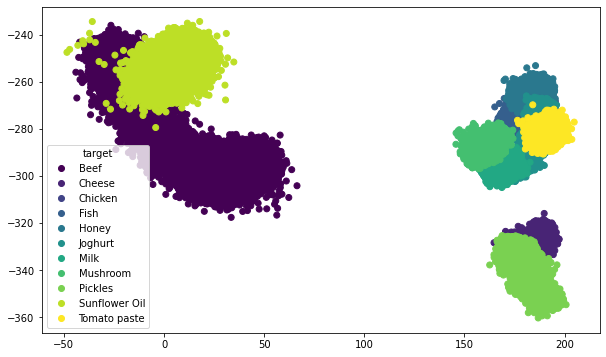

In [ ]:
fig = plt.figure(figsize = (10,6))
encoded_dataset = encoder.predict(X)
scatter = plt.scatter(encoded_dataset[:,0], encoded_dataset[:,1]
                      , c=df['target'].astype('category').cat.codes)
targets = ['Beef', 'Cheese', 'Chicken','Fish','Honey','Joghurt','Milk'
            ,'Mushroom','Pickles','Sunflower Oil', 'Tomato paste']
plt.legend(loc='best', handles=scatter.legend_elements()[0], labels=targets, title="target")
plt.show()

In [ ]:
def profit_loss_pct(N):
    df_n_days = df.tail(N)
    profit_loss_prcnt = ((df_n_days["Open Price"] - df_n_days["Close Price"])/df_n_days["Close Price"])
    for n in range(N):
        if profit_loss_prcnt[n] < 0:
            print("Loss:", profit_loss_prcnt[n]*100,"%")
        else:
            print("Profit:", profit_loss_prcnt[n]*100,"%")

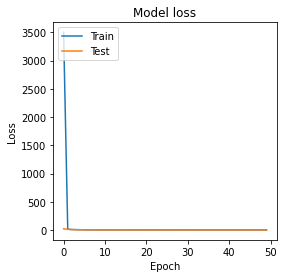

In [ ]:
fig = plt.figure(figsize = (4,4))
plt.plot(au.history['loss']) 
plt.plot(au.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [ ]:
dataset = pd.read_csv('/content/IB_Mixed_FishBeef_260322.csv')
dataset['target'] = 'Mixed'
dataset.drop('Ticks',axis=1,inplace=True)
   
features = ['MQ2','MQ3','MQ4','MQ5','MQ6','MQ7','MQ8','MQ9','MQ135'] 
# Separating out the features
X = dataset.loc[:, features].values 
# Separating out the target
y = dataset.loc[:,['target']].values    

In [ ]:
ts = X

In [ ]:
encoded_dataset = encoder.predict(ts)
decoded_dataset = decoder.predict(encoded_dataset)

Original_dataset = pd.DataFrame(ts)
Reconstructed_dataset = pd.DataFrame(decoded_dataset)

In [ ]:
Original_dataset

,0,1,2,3,4,5,6,7,8
0,119,154,165,162,114,75,225,127,823
1,114,151,165,157,115,72,219,122,813
2,115,146,158,151,115,76,221,127,806
3,117,149,165,152,119,74,221,126,809
4,116,155,159,152,120,76,223,124,818
...,...,...,...,...,...,...,...,...,...
32101,131,143,173,133,138,88,241,139,923
32102,135,150,173,142,144,87,239,143,923
32103,137,143,174,139,147,91,233,145,922
32104,129,147,173,137,142,87,237,141,922


In [ ]:
Reconstructed_dataset

,0,1,2,3,4,5,6,7,8
0,108.838150,160.290070,148.317505,94.362129,124.337769,93.246490,254.561508,129.536057,821.240967
1,106.944061,157.072861,148.744690,90.217178,122.120743,89.588577,248.269775,125.232689,811.199097
2,107.715195,151.494400,143.259979,91.452415,123.053207,92.552826,247.121948,128.742767,804.257080
3,110.080551,154.628235,149.877579,90.167000,126.074379,90.416061,248.078857,128.788986,807.235657
4,109.729034,160.361404,144.584259,92.254196,124.988411,90.522369,249.207611,128.607925,816.234924
...,...,...,...,...,...,...,...,...,...
32101,124.272285,146.441376,162.973282,92.904716,143.106125,97.160393,258.326324,142.588806,921.037720
32102,128.988449,154.013580,161.445526,94.821907,148.303192,97.657425,259.406555,147.393799,920.944092
32103,130.596405,146.917770,162.674469,92.202751,150.528763,100.436111,253.175598,150.819489,919.945129
32104,125.750916,150.690094,162.166718,92.782654,144.598511,97.643372,256.193909,144.349701,919.924927


In [ ]:
fig = plt.figure(figsize = (10,6))
encoded_dataset = encoder.predict(ts)
scatter = plt.scatter(encoded_dataset[:,0], encoded_dataset[:,1]
                      , c=df['target'].astype('category').cat.codes)
targets = ['Beef', 'Cheese', 'Chicken','Fish','Honey','Joghurt','Milk'
            ,'Mushroom','Pickles','Sunflower Oil', 'Tomato paste']
plt.legend(loc='best', handles=scatter.legend_elements()[0], labels=targets, title="target")
plt.show()

In [10]:
import numpy as np
y_hat = Reconstructed_dataset
y_true = Original_dataset
def rmse(predictions, targets):
    differences = predictions - targets
    differences_squared = differences ** 2
    mean_of_differences_squared = differences_squared.mean()
    rmse_val = np.sqrt(mean_of_differences_squared)
    return rmse_val
# print("d is: " + str(["%.8f" % elem for elem in y_hat]))
# print("p is: " + str(["%.8f" % elem for elem in y_true]))
rmse_val = rmse(y_hat, y_true)
print("rms error is: \n" + str(rmse_val))

rms error is: 
0    2.350970
1    0.274613
2    0.667479
3    3.527992
4    2.238487
5    1.604409
6    1.551592
7    2.207347
8    0.256111
dtype: float64


In [ ]:
d is: ['0.00000000', '1.00000000', '2.00000000', '3.00000000', '4.00000000', '5.00000000', '6.00000000', '7.00000000', '8.00000000']
p is: ['0.00000000', '1.00000000', '2.00000000', '3.00000000', '4.00000000', '5.00000000', '6.00000000', '7.00000000', '8.00000000']
rms error is: 
0     7.648920
1     4.524791
2    12.507500
3    52.230697
4     4.577289
5    10.909953
6    22.675179
7     6.805331
8     1.897488
dtype: float64